In [22]:
# Team 3
# Anirban Mukherjee
# Manjusha Chava
# Tae Hyun Je  
# 11/11/2020

In [23]:
# importing comms libraries
import numpy as np
import matplotlib.pyplot as plt
from commpy.filters import rcosfilter, rrcosfilter
import scipy.interpolate

160


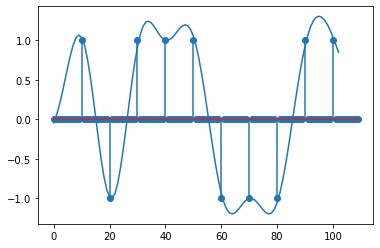

In [71]:
# Question 1
d = 2*np.around(np.random.random((10,)))-1

# Define raised cosine pulse shape
time, impulse_resp = rcosfilter(61,0.5,1,10)

# Create transmission using raised cosine shape
# Upsampling 
N = 10
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 61th sample is ith element of d
print(len(sig_temp))
sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:123] # gets 70 elements

index = np.arange(0,60,6)
d_hat1 = sig1[index]

for i in range(10):
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1)
plt.stem(d_upsample)
plt.show()

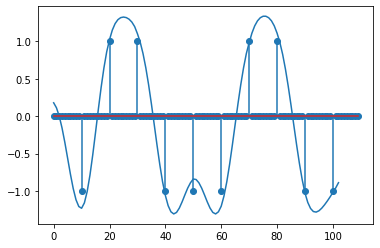

In [69]:
#Question 2
d = 2*np.around(np.random.random((10,)))-1

# Define square root raised cosine pulse shape
time, impulse_resp = rrcosfilter(61,0.5,1,10)

# Create transmission using square root raised cosine shape
# Upsampling 
N = 10
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 61th sample is ith element of d

sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:123] # gets 70 elements

index = np.arange(0,60,6)
d_hat1 = sig1[index]

for i in range(10):
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1)
plt.stem(d_upsample)
plt.show()